In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn import externals
from io import StringIO
import pydotplus
import seaborn as sns
from sklearn.metrics import accuracy_score
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz

In [4]:
df = pd.read_csv("Fraud_check.csv")
df1 = df.copy()
df1.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [5]:
df1.shape

(600, 6)

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [6]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Taxable.Income,600.0,55208.375000,26204.827597,10003.0,32871.50,55074.5,78611.75,99619.0
City.Population,600.0,108747.368333,49850.075134,25779.0,66966.75,106493.5,150114.25,199778.0
Work.Experience,600.0,15.558333,8.842147,0.0,8.00,15.0,24.00,30.0


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Taxable.Income'>

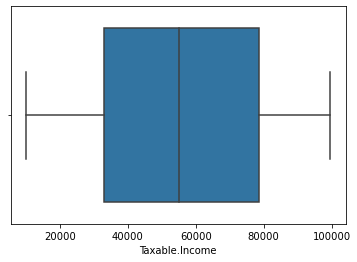

In [7]:
sns.boxplot(df1['Taxable.Income'])
#Absence of outliers

Skew: 0.030014788906377175
Kurtosis: -1.1997824607083138


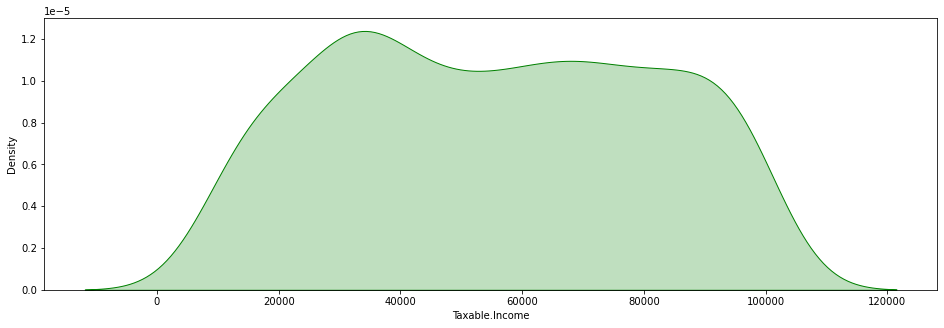

In [9]:
plt.figure(figsize=(16,5))
print("Skew: {}".format(df1['Taxable.Income'].skew()))
print("Kurtosis: {}".format(df1['Taxable.Income'].kurtosis()))
ax = sns.kdeplot(df1['Taxable.Income'],shade=True,color='g')
plt.show()

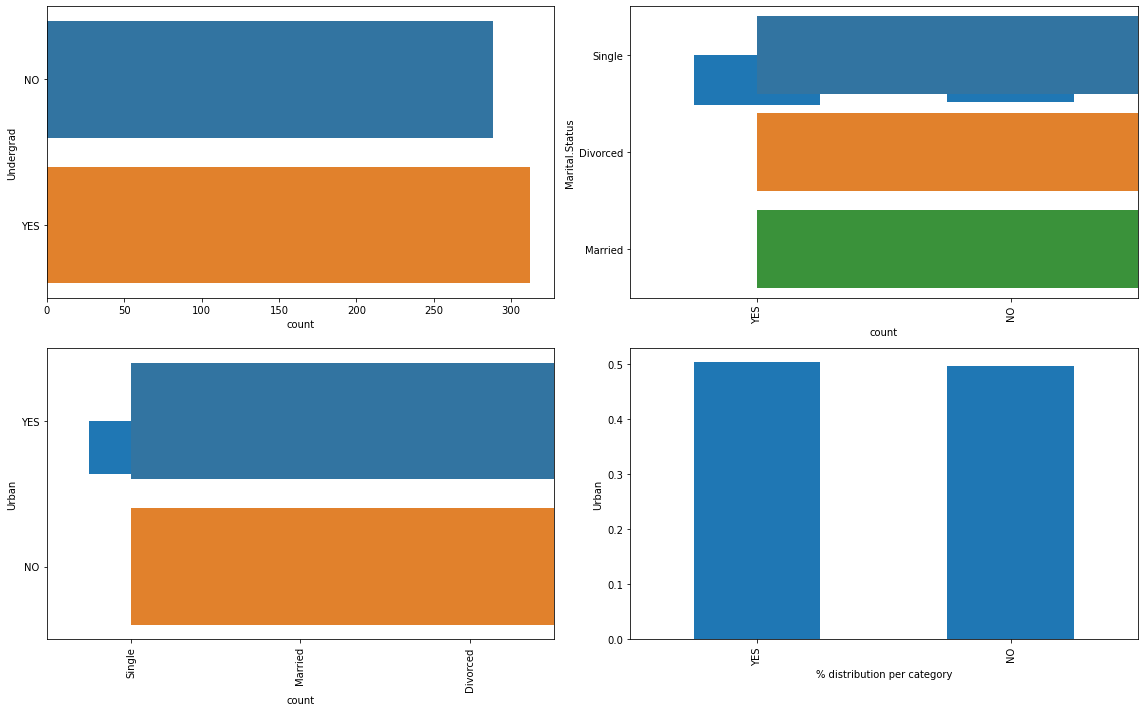

In [10]:
obj_colum = df1.select_dtypes(include='object').columns.tolist()
plt.figure(figsize=(16,10))
for i,col in enumerate(obj_colum,1):
    plt.subplot(2,2,i)
    sns.countplot(data=df1,y=col)
    plt.subplot(2,2,i+1)
    df1[col].value_counts(normalize=True).plot.bar()
    plt.ylabel(col)
    plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show()  

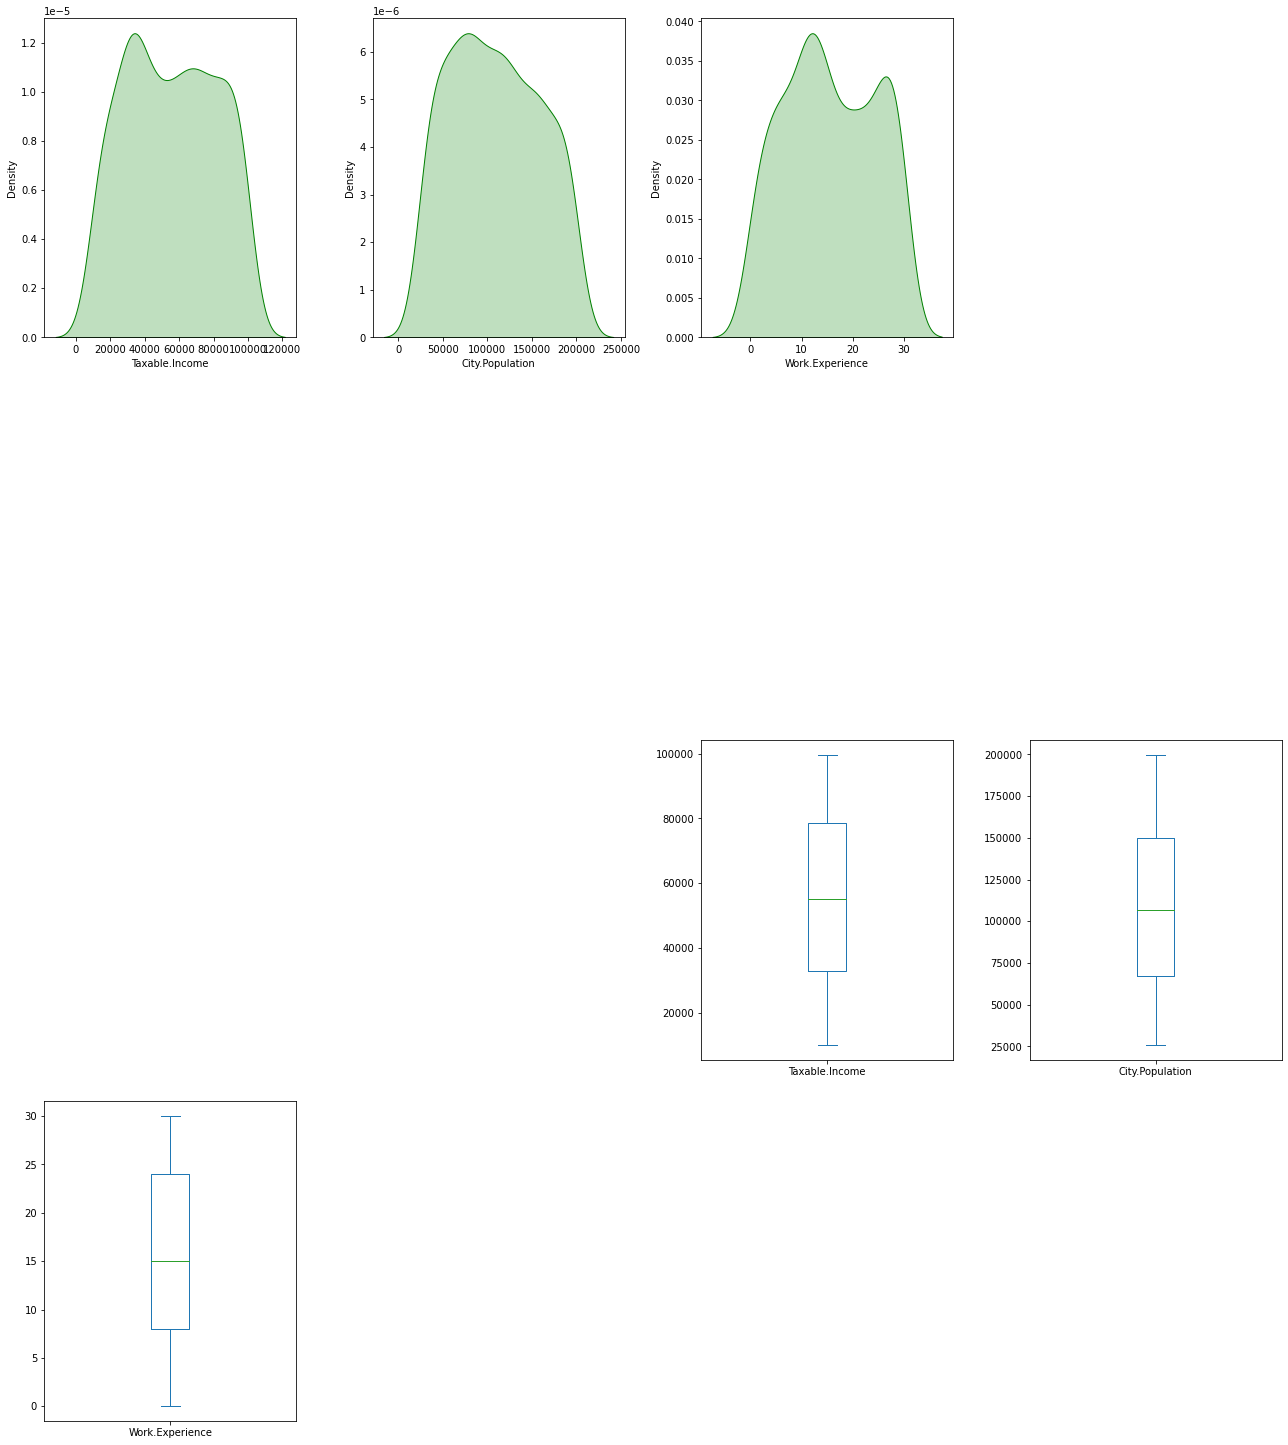

,Taxable.Income,City.Population,Work.Experience
skewness,0.030015,0.125009,0.018529
kurtosis,-1.199782,-1.120154,-1.167524


In [11]:
num_columns = df1.select_dtypes(exclude='object').columns.tolist()
plt.figure(figsize=(18,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(df[col],color='g',shade=True)
    plt.subplot(8,4,i+10)
    df[col].plot.box()
plt.tight_layout() 
plt.show()
num_data = df[num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])

<AxesSubplot:>

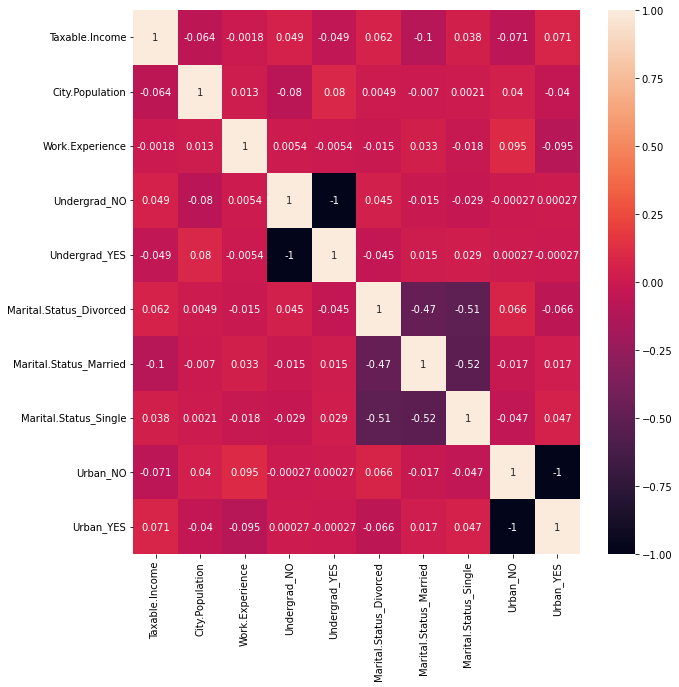

In [12]:
df1 = pd.get_dummies(df1, columns = ['Undergrad','Marital.Status','Urban'])
corr = df1.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

In [13]:
df1['Taxable.Income']=pd.cut(df1['Taxable.Income'],bins=[0,30000,100000],labels=['risky','good'])
df1

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,good,50047,10,1,0,0,0,1,0,1
1,good,134075,18,0,1,1,0,0,0,1
2,good,160205,30,1,0,0,1,0,0,1
3,good,193264,15,0,1,0,0,1,0,1
4,good,27533,28,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
595,good,39492,7,0,1,1,0,0,0,1
596,good,55369,2,0,1,1,0,0,0,1
597,good,154058,0,1,0,1,0,0,0,1
598,good,180083,17,0,1,0,1,0,1,0


In [14]:
df1['Taxable.Income'].value_counts()

good     476
risky    124
Name: Taxable.Income, dtype: int64

In [15]:
X = df1.iloc[:,1:10]
y = df1.iloc[:,0]
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)
y_train.value_counts()

good     384
risky     96
Name: Taxable.Income, dtype: int64

In [16]:
model = DT(criterion='entropy') 
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [18]:
pred_train = model.predict(x_train)
print(classification_report(y_train,pred_train))

              precision    recall  f1-score   support

        good       1.00      1.00      1.00       384
       risky       1.00      1.00      1.00        96

    accuracy                           1.00       480
   macro avg       1.00      1.00      1.00       480
weighted avg       1.00      1.00      1.00       480



In [19]:
pred_test = model.predict(x_test)
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

        good       0.73      0.78      0.75        92
       risky       0.05      0.04      0.04        28

    accuracy                           0.61       120
   macro avg       0.39      0.41      0.40       120
weighted avg       0.57      0.61      0.59       120



In [20]:
confusion_matrix(y_test,pred_test)

array([[72, 20],
       [27,  1]], dtype=int64)

In [21]:
df_t=pd.DataFrame({'Actual':y_test, 'Predicted':pred_test})
df_t

,Actual,Predicted
391,good,good
235,good,good
490,good,good
285,good,good
403,good,good
...,...,...
293,good,good
281,good,good
440,good,good
143,risky,good


In [22]:
cols = list(df1.columns)
predictors = cols[1:10]
target = cols[0]
dot_data = StringIO()
export_graphviz(model, out_file = dot_data ,filled = True,rounded =True,feature_names = predictors,class_names = target, impurity = False)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('fraud_full.png')

True

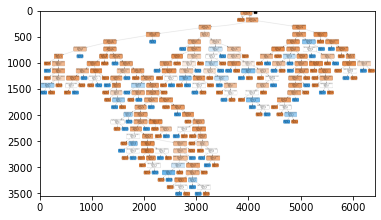

In [23]:
img = mpimg.imread('fraud_full.png') 
plt.imshow(img)

In [24]:
fi = pd.DataFrame({'feature': list(x_train.columns),
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)
fi

,feature,importance
0,City.Population,0.594848
1,Work.Experience,0.226891
5,Marital.Status_Married,0.059801
7,Urban_NO,0.042348
8,Urban_YES,0.018717
6,Marital.Status_Single,0.017989
2,Undergrad_NO,0.015597
4,Marital.Status_Divorced,0.013901
3,Undergrad_YES,0.009908


In [ ]:
#city population is the most imp feature.